# Playground - Part II

🎯 **Goal**: Get a better understanding of ***Neural Network hyperparameters***

<hr>

👉 Open the [Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3&seed=0.06711&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=false&regularizationRate_hide=false) again to learn more about Neural Networks. 

❗️ Keep in mind that as the algorithm is stochastic, the results may differ from one run to another. For this reason, do not hesitate to re-run the algorithms multiple times to analyse the behavior of your Neural Networks and draw your conclusions accordingly.

🕵🏻 Let's explore the different items we have seen during the lecture:
- **Batch Size**
- **Regularization**
- **Learning Rate**

## (1) The batch size

❓ **Initial Question** ❓ Select the `circle dataset` (Classification). 

* Build a model with: 
    * one hidden layer with 3 neurons,
    * a _learning rate_ equal to 0.03, 
    * and the _tanh_ activation function

* Do not add any noise (=0).

* Select a batch size of 30

***Look at the convergence of the algorithm. Does it seem slow or fast?***

> <i>Answer here</i> 

- The convergence looks relatively fast

❓ **Question: What is happening with a batch size of 1** ❓ 

Now, run this neural network on the same dataset but... 

* with a batch-size of 1.
* Make sure to run it for at least 150 epochs. 

***What do you notice about the train and test loss? What is the reason of this instability?***

> <i>Answer here</i>

- When you train a model with a batch size of 1, the model's updates become more volatile, leading to instability. This approach is known as stochastic gradient descent. The reasons are:



**Sampling Noise**: With a batch size of 1, each update is based on the error of a single example. This leads to high variance in updates, causing the model to jump around in the parameter space.


**Noisy Gradient Estimates**: The gradient calculated with a single example is a noisy estimate of the true gradient. Consequently, the model might not converge to a minimum, but keep bouncing around it due to the noise.


**Overfitting**: When you use a batch size of 1, you're making updates based on individual examples, which can lead to overfitting. The model can end up learning the noise in the data rather than the underlying pattern.

❓ **Question/Observation** ❓ 

Now, you can see the effect of the _batch_size_ by reading the values of the train loss and test loss: pause the iterations and run it step by step (iteration per iteration) using the `"Step"` button (at the right side of the play/stop button).

> <i>Answer here</i>

## 2. Regularization

❓ **Question about the lack of generalization** ❓ 

To once again observe the **lack of generalization**:
* Select the `"eXclusive OR"(XOR)` dataset, 
* with a noise of 50,
* Add a second hidden layer with again 8 neurons. 

***Try to fit your model once again... what do you expect?***

> <i>Add your comments here</i>

- The model doesn't converge and generalize well as a result of the low batch size and high noise.

❗️ With a smaller batch size, your model will end up overfitting faster... ❗️

👉 Although, let's keep ***`batch size = 1`*** for the next question and try to understand how to prevent overfitting using the strategy of `regularization`.

❓ **Question about regularization** ❓ 

Can we ***regularize*** our network to ***avoid overfitting***? 

* Keep the batch size to 1,
* Add a `L2-regularization`,
* Increase the power of this L2-regularization until it smooths out the decision boundary! 
Notice how the test loss doesn't increase anymore with the epochs

> <i>Add your comments here</i>

- Yes, regularization is one of the most effective ways of preventing overfitting.

❓ **Questions with the spiral dataset** ❓ 

<u>Configuration</u>:

* Select the `spiral dataset`,
* Remove regularization,
* Increase the `ratio of training to test data` to 80%. 

<u>Neural Network</u>: 3 hidden layers with:
* 8 neurons on the first layer, 
* 7 neurons on the second layer,
* 6 neurons on the third layer. 

<u>Experiment</u>:

* Run the algorithm with a batch size of 30,
* Make sure to run it for at least 1500 epochs,
* Then, compare it to the same run but with a batch size of 1. 

You can check what happens on the train loss and test loss step by step.

> <i>Add your comments here</i>

- Batch size 30 makes the model converge
- Batch size 1 causes high variance and instability in the model.

## (3) The learning rate

Go back to the <u>`circle dataset`</u>:
* with no noise,
* and a *ratio of training to test data* of 50%,
* Use a batch size of 20. 

Use a <u>neural network</u> with:
* one layer of 5 neurons,
* no regularization, 
* and the tanh activation function

❓ **Question about the learning rate** ❓ 

For each learning rate (from 0.0001 to 10), run the algorithm during 1000 epochs and report the values of the test loss in the list below. Then, plot the test loss with respect to the learning rates. 

❗️ <u>Warning</u> ❗️ When you change the learning rate, make sure to reinitialize the neural network (_circular arrow, left to the play/pause button_).

2/2 [==============================] - 0s 4ms/step - loss: 7.7207


Text(0, 0.5, 'Test loss')

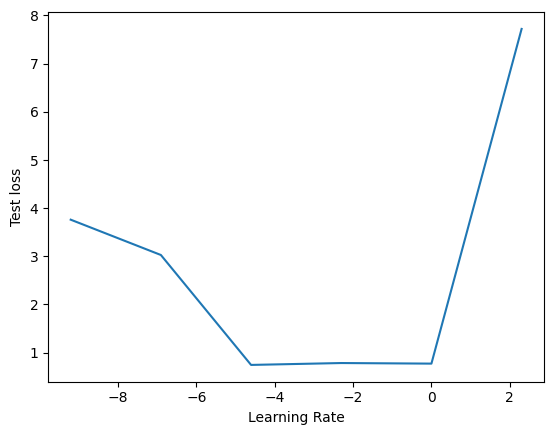

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

X, y = make_circles(n_samples=100, noise=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
test_loss = []

for i in learning_rates:
    model = models.Sequential()
    
    model.add(layers.Dense(5, activation="tanh", input_dim=2))
    #model.add(layers(Dense(2, activation="sigmoid")))
    
    model.compile(loss="binary_crossentropy",
                 optimizer=SGD(learning_rate=i))
    
    history = model.fit(X_train, y_train, epochs=500, verbose=0, batch_size=20)
    loss = model.evaluate(X_test, y_test)
    test_loss.append(loss)

plt.plot(np.log(learning_rates), test_loss);
plt.xlabel("Learning Rate")
plt.ylabel("Test loss")

❗️ <u>Warning</u> ❗️ Too low and too high learning rates both lead to a high test loss... but not for the same reasons!

* A **low learning rate** helps a neural network converge in a similar fashion to a moderate learning rate but... way slower... i.e. more epochs would be needed!
* A **high learning rate** makes the algorithm diverge completely.
    - Try a learning rate $ \alpha = 10 $ with 400 epochs, you should see the loss vary. This corresponds to the fact that the algorithms converge to *different local minima*



🏁 Congratulations!

💾 Do not forget to `git add/commit/push` your notebook...

🚀 ... and move to the next challenge!